<a href="https://colab.research.google.com/github/Hambach-AA/Big-Data-Mining-Lab/blob/main/Lab_2_IABD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библеотек

In [22]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns  import  apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


Выполнение поиска частных наборов

In [23]:
def apyori_fun(dataset, min_thresholds):
  result = []
  times = []
  result_0 = apriori(dataset, min_support = 0.001, use_colnames  =  True)
  for i in range(len(min_thresholds)):
    time_1 = time.time()
    result.append(association_rules(result_0, metric = "confidence", min_threshold = min_thresholds[i]))
    time_2 = time.time()
    times.append(time_2 - time_1)
  return result, times

Вывод получивщихся результатов

In [24]:
def results(result, min_thresholds):
  for i in range(len(result)):
    print(min_thresholds[i])
    print("<---->")
    for j in range(len(result[i])):
      print("{} -> {}: {}".format(set(result[i]['antecedents'][j]), set(result[i]['consequents'][j]), round(result[i]['confidence'][j], 4)))
    print("<---->")

Построение графика

In [59]:
def chart(result, min_thresholds, times):
  
  support = []
  for i in min_thresholds:
    support.append(str(i))

  quantity = []

  for i in range(len(result)):
    quantity.append(len(result[i]))

  max_meaning = []
  for i in range(len(result)):
      sum = 0
      for j in range(len(result[i])):
        if len(result[i]['antecedents'][j]) + len(result[i]['consequents'][j]) <= 7:
          sum += 1
      max_meaning.append(sum)

  plt.bar(support, times)
  plt.xlabel("Значение достоверности")
  plt.ylabel("Время работы")
  plt.show()

  plt.bar(support, quantity)
  plt.xlabel("Значение достоверности")
  plt.ylabel("Количество наборов")
  plt.show()

  plt.bar(support, max_meaning)
  plt.xlabel("Значение достоверности")
  plt.ylabel("Антецедент + консеквент <= 7")
  plt.show()

**Набор данных**

Подключение данных

In [61]:
data = pd.read_csv('Market_Basket_Optimisation.csv',encoding = "ISO-8859-1", header = None)
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

print(transactions)
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
dataset = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)



[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

In [62]:
data1 = pd.read_csv('groceries.csv',encoding = "ISO-8859-1", header = None)
transactions1 = []
for i in range(0, len(data1)):
    transactions1.append([str(data1.values[i,j]) for j in range(0, len(data1.columns))])

print(transactions1)
encoder1 = TransactionEncoder().fit(transactions1)
onehot1 = encoder1.transform(transactions1)
dataset1 = pd.DataFrame(onehot1, columns = encoder1.columns_).drop('nan', axis=1)

[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'], ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['tropical fruit', 'yogurt', 'coffee', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole milk', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads', 'nan', 'nan', 'na

In [64]:
data2 = pd.read_csv('retail.csv',encoding = "ISO-8859-1", header = None)
transactions2 = []
for i in range(0, len(data2)):
    transactions2.append([str(data2.values[i,j]) for j in range(0, len(data2.columns))])

print(transactions2)
encoder2 = TransactionEncoder().fit(transactions2)
onehot2 = encoder2.transform(transactions2)
dataset2 = pd.DataFrame(onehot2, columns = encoder2.columns_).drop('nan', axis=1)

[['1', '2', '3', '4', '5', '6', '7'], ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'], ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan', 'nan'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan', 'nan'], ['Meat', 'Pencil', 'Wine', 'nan', 'nan', 'nan', 'nan'], ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'], ['Wine', 'Pencil', 'Eggs', 'Cheese', 'nan', 'nan', 'nan'], ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper', 'nan', 'nan'], ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs', 'nan'], ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan', 'nan'], ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'], ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat', 'nan', 'nan'], ['Bagel', 'Cheese', 'Milk', 'Meat', 'nan', 'nan', 'nan'], ['Bread', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['Pencil', 'Diaper', 'Bagel', 'nan', 'nan', 'nan', 'nan

Установка pначениq достоверности

In [65]:
min_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Поиск и вывод результатов

0.7
<---->
{'pancakes', 'bacon'} -> {'spaghetti'}: 0.8125
{'chocolate', 'barbecue sauce'} -> {'mineral water'}: 0.7692
{'turkey', 'black tea'} -> {'eggs'}: 0.7333
{'frozen smoothie', 'black tea'} -> {'milk'}: 0.8182
{'black tea', 'salmon'} -> {'mineral water'}: 0.8
{'eggs', 'blueberries'} -> {'mineral water'}: 0.75
{'pancakes', 'blueberries'} -> {'mineral water'}: 0.7273
{'rice', 'burgers'} -> {'mineral water'}: 0.7273
{'white wine', 'cake'} -> {'spaghetti'}: 0.7273
{'soup', 'champagne'} -> {'mineral water'}: 0.7143
{'protein bar', 'chicken'} -> {'spaghetti'}: 0.8182
{'tomato sauce', 'red wine'} -> {'chocolate'}: 0.8
{'fromage blanc', 'cooking oil'} -> {'mineral water'}: 0.8182
{'cooking oil', 'whole wheat pasta'} -> {'mineral water'}: 0.7059
{'cooking oil', 'red wine'} -> {'spaghetti'}: 0.7059
{'french wine', 'cottage cheese'} -> {'spaghetti'}: 0.7273
{'eggs', 'tomato sauce'} -> {'mineral water'}: 0.7
{'energy drink', 'grated cheese'} -> {'spaghetti'}: 0.7273
{'pasta', 'mushroom cream

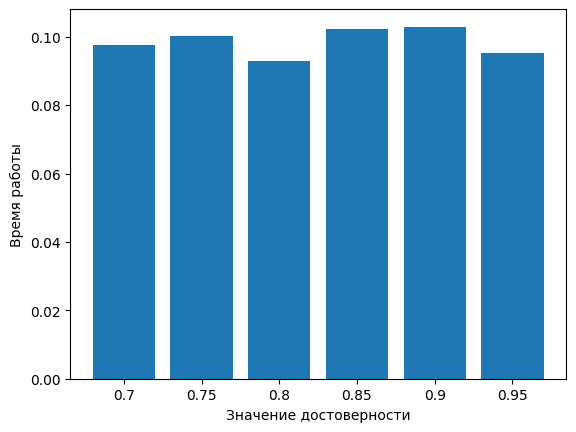

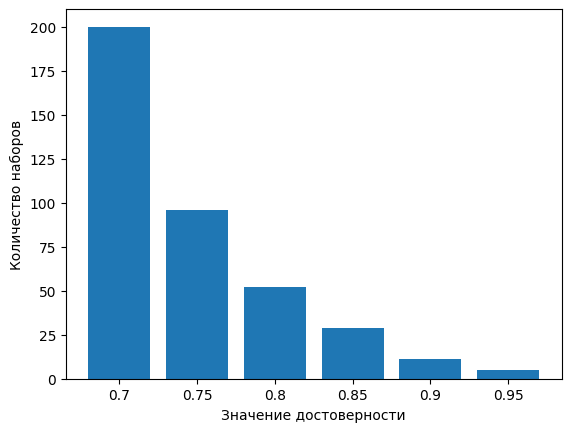

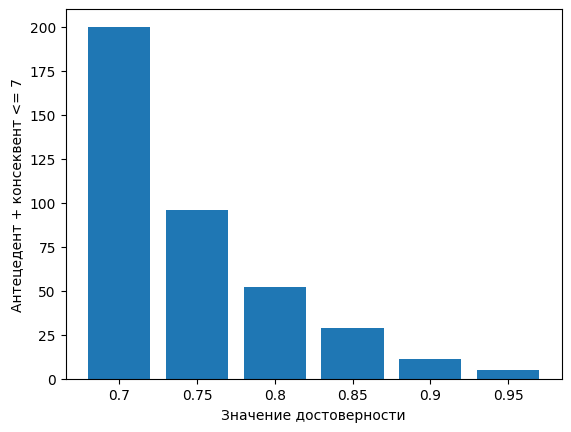

In [66]:
result, times = apyori_fun(dataset, min_thresholds)
results(result, min_thresholds)
chart(result, min_thresholds, times)

0.7
<---->
{'honey'} -> {'whole milk'}: 0.7333
{'yogurt', 'Instant food products'} -> {'whole milk'}: 0.7857
{'beef', 'UHT-milk'} -> {'other vegetables'}: 0.7143
{'beef', 'baking powder'} -> {'other vegetables'}: 0.7333
{'hard cheese', 'baking powder'} -> {'whole milk'}: 0.7692
{'root vegetables', 'baking powder'} -> {'other vegetables'}: 0.7143
{'pork', 'baking powder'} -> {'whole milk'}: 0.7647
{'yogurt', 'baking powder'} -> {'whole milk'}: 0.7111
{'berries', 'frankfurter'} -> {'whole milk'}: 0.7273
{'chicken', 'beverages'} -> {'other vegetables'}: 0.7143
{'hamburger meat', 'bottled beer'} -> {'whole milk'}: 0.8095
{'red/blush wine', 'liquor'} -> {'bottled beer'}: 0.9048
{'soups', 'bottled beer'} -> {'whole milk'}: 0.9167
{'bottled water', 'mustard'} -> {'whole milk'}: 0.75
{'rice', 'bottled water'} -> {'whole milk'}: 0.9231
{'bottled water', 'turkey'} -> {'whole milk'}: 0.75
{'herbs', 'brown bread'} -> {'other vegetables'}: 0.7333
{'butter', 'cat food'} -> {'whole milk'}: 0.7083
{'b

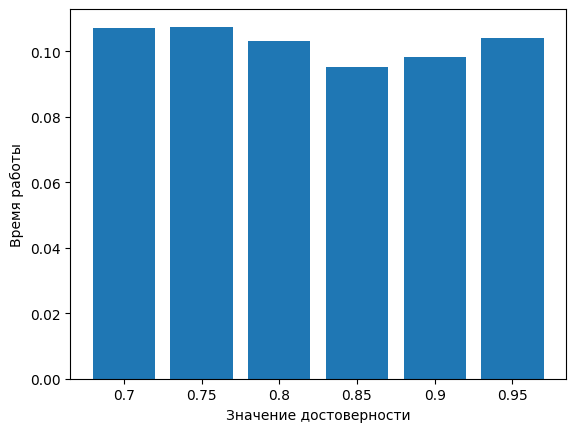

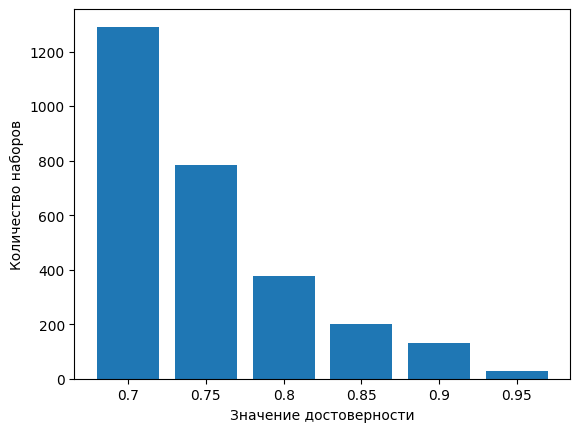

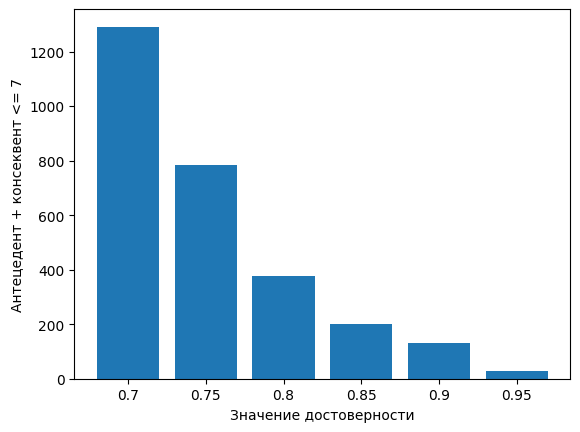

In [67]:
result, times = apyori_fun(dataset1, min_thresholds)
results(result, min_thresholds)
chart(result, min_thresholds, times)

Выходные данные были обрезаны до нескольких последних строк (5000).
{'6', '1', '2'} -> {'3', '7'}: 1.0
{'6', '2', '7'} -> {'3', '1'}: 1.0
{'3', '1', '7'} -> {'6', '2'}: 1.0
{'3', '6', '1'} -> {'2', '7'}: 1.0
{'3', '6', '7'} -> {'1', '2'}: 1.0
{'6', '1', '7'} -> {'3', '2'}: 1.0
{'3', '2'} -> {'6', '1', '7'}: 1.0
{'1', '2'} -> {'3', '6', '7'}: 1.0
{'2', '7'} -> {'3', '6', '1'}: 1.0
{'6', '2'} -> {'3', '1', '7'}: 1.0
{'3', '1'} -> {'6', '2', '7'}: 1.0
{'3', '7'} -> {'6', '1', '2'}: 1.0
{'3', '6'} -> {'1', '2', '7'}: 1.0
{'1', '7'} -> {'3', '6', '2'}: 1.0
{'6', '1'} -> {'3', '2', '7'}: 1.0
{'6', '7'} -> {'3', '1', '2'}: 1.0
{'2'} -> {'3', '6', '1', '7'}: 1.0
{'3'} -> {'6', '1', '2', '7'}: 1.0
{'1'} -> {'3', '6', '2', '7'}: 1.0
{'7'} -> {'3', '6', '1', '2'}: 1.0
{'6'} -> {'3', '1', '2', '7'}: 1.0
{'1', '5', '2', '4'} -> {'6'}: 1.0
{'6', '5', '2', '4'} -> {'1'}: 1.0
{'6', '1', '5', '2'} -> {'4'}: 1.0
{'6', '1', '5', '4'} -> {'2'}: 1.0
{'6', '1', '2', '4'} -> {'5'}: 1.0
{'5', '2', '4'} -> {'6

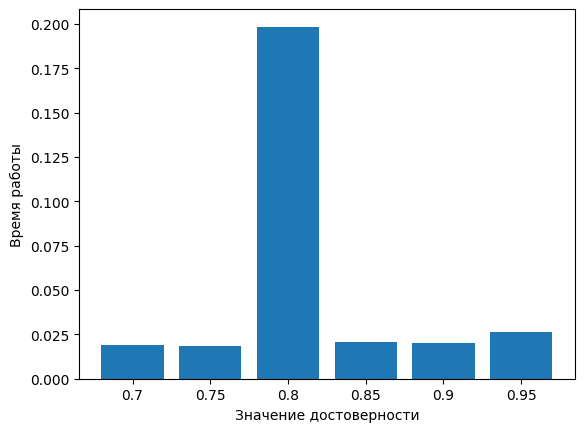

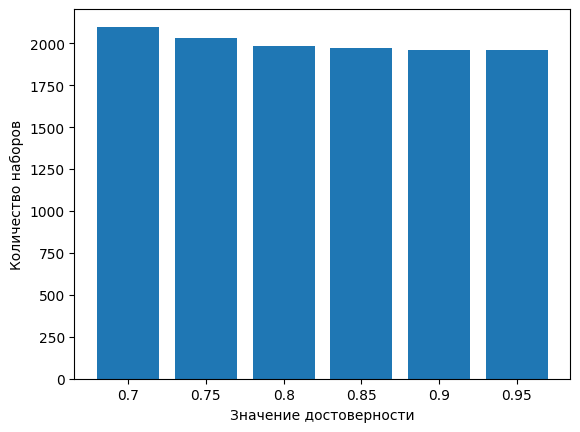

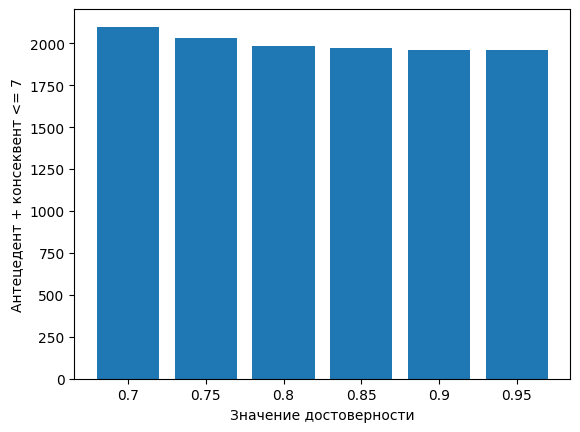

In [68]:
result, times = apyori_fun(dataset2, min_thresholds)
results(result, min_thresholds)
chart(result, min_thresholds, times)